In [681]:
# Import Libraries

import pandas as pd
import numpy as np

# 1. Import Data

In [682]:
#Import data

iris = pd.read_csv('IRIS.csv')

iris




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Clean dataset

In [683]:
# drop label column in dataset for unsupervised learning

iris_u = iris.drop(columns=['species'])

iris_u

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [684]:
iris_u.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [685]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Most clustering algorithms do not work well with missing values. Ensure that rows with missing values in dataset are dropped

iris_u = iris_u.dropna(subset = features)

iris_u

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 3. Scale data

In [686]:
iris_u  = ((iris_u - iris_u.min()) / (iris_u.max() - iris_u.min())) * 5 + 1
iris_u
data = iris_u.copy()
data

,sepal_length,sepal_width,petal_length,petal_width
0,2.111111,4.125000,1.338983,1.208333
1,1.833333,3.083333,1.338983,1.208333
2,1.555556,3.500000,1.254237,1.208333
3,1.416667,3.291667,1.423729,1.208333
4,1.972222,4.333333,1.338983,1.208333
...,...,...,...,...
145,4.333333,3.083333,4.559322,5.583333
146,3.777778,2.041667,4.389831,4.750000
147,4.055556,3.083333,4.559322,4.958333
148,3.638889,3.916667,4.728814,5.583333


In [687]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,3.143519,3.195833,3.337853,3.288889
std,1.150092,0.903321,1.495272,1.589918
min,1.000000,1.000000,1.000000,1.000000
25%,2.111111,2.666667,1.508475,1.416667
50%,3.083333,3.083333,3.838983,3.500000
75%,3.916667,3.708333,4.474576,4.541667
max,6.000000,6.000000,6.000000,6.000000


# 4. Create Random Centroids

In [688]:
def random_centroids(dataset, k):
  centroids = []
  for i in range(k):
      centroid = data.apply(lambda x: float(x.sample()))
      centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [689]:
centroids = random_centroids(data, 3)
centroids

<ipython-input-688-181455d52abb>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
sepal_length,2.388889,3.500000,1.694444
sepal_width,3.083333,3.083333,2.458333
petal_length,5.067797,4.474576,1.423729
petal_width,1.416667,1.208333,1.625000


# 5. Assign Cluster to Each Point in Dataset

In [690]:
def get_labels(dataset, centroids):
    distances = centroids.apply(lambda x: np.linalg.norm(data - x, axis=1))
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)

labels

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    0
149    0
Length: 150, dtype: int64

In [691]:
labels.value_counts()

1    78
2    55
0    17
Name: count, dtype: int64

# 6. Create New Centroids

In [692]:
#find all datapoints in a cluster and take the geometric mean (center of points in Euclidean space)
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids




# 7. [Optional] - Create Iteration Visualization using PCA

In [693]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_iterations(dataset, labels, centroids, iteration):
  pca = PCA(n_components=2)
  dataset_2d = pca.fit_transform(dataset) #Transform data to 2 dimensions
  centroids_2d = pca.transform(centroids.T) #Transform centroids to 2 dimension and transpose
  clear_output(wait=True) #Clears after each iteration
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=dataset_2d[:,0], y=dataset_2d[:,1], c=labels) #plots 2 dimensional data coloring with labels derived from distance from centroid  calculation of data
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) #plots centroids
  plt.show()








# 8. Create Function Incorporating Repeat Loop

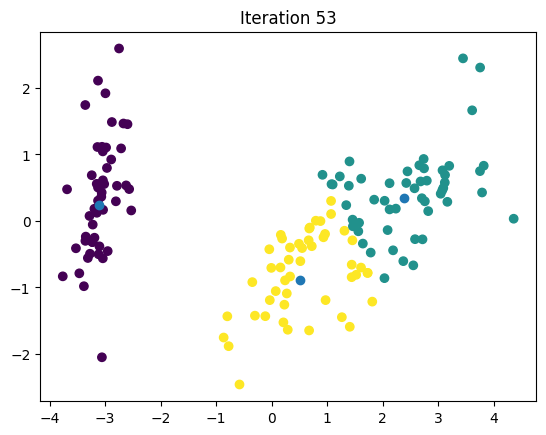

Datapoints in each cluster: 
1    52
0    50
2    48
Name: count, dtype: int64


In [726]:
def constructed_K_means(max_iterations, centroid_count, iterations ):

  centroids = random_centroids(data, centroid_count)
  old_centroids = pd.DataFrame()


  while iterations < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_iterations(data, labels, centroids, iterations)
    iterations += 1

  print (f'Datapoints in each cluster: ')
  print (f'{labels.value_counts()}')


max_iterations = 70
centroid_count = 3
iterations = 50

constructed_K_means(max_iterations, centroid_count, iterations)




In [695]:
centroids

,0,1,2
sepal_length,2.388889,3.500000,1.694444
sepal_width,3.083333,3.083333,2.458333
petal_length,5.067797,4.474576,1.423729
petal_width,1.416667,1.208333,1.625000


In [696]:
labels.value_counts()

1    78
2    55
0    17
Name: count, dtype: int64

# 9. Evaluate Results

The section evaluates the results of the algorithm with the original data labels dropped before processes. First a plot showing the label distribution is plotted using PCA

In [697]:
original_labels = iris['species']

# Define a dictionary to map categories to integers
category_map = {'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}

# Use the map function to replace categories with integers
original_labels = original_labels.map(category_map)

original_labels

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

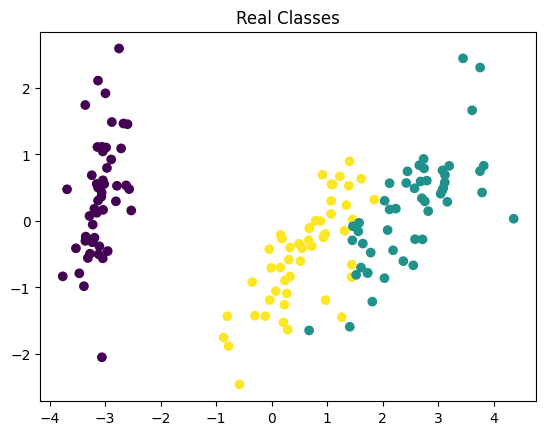

Datapoints in each Label: 
species
0    50
2    50
1    50
Name: count, dtype: int64


In [698]:
def plot_data(dataset, labels):
  pca = PCA(n_components=2)
  dataset_2d = pca.fit_transform(dataset)
  plt.title(f'Real Classes')
  plt.scatter(x=dataset_2d[:,0], y=dataset_2d[:,1], c=labels)
  plt.show()

plot_data(iris_u, original_labels)

print (f'Datapoints in each Label: ')
print (f'{original_labels.value_counts()}')

# 10. Compare Results to Scikit Learn K-Means

In [699]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [700]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
sepal_length,4.536325,1.980556,3.206284
sepal_width,3.254274,3.954167,2.536885
petal_length,4.985224,1.393220,3.878577
petal_width,5.123932,1.300000,3.745902


In [701]:
centroids # Constructed K-Means Centroids

,0,1,2
sepal_length,2.388889,3.500000,1.694444
sepal_width,3.083333,3.083333,2.458333
petal_length,5.067797,4.474576,1.423729
petal_width,1.416667,1.208333,1.625000


In [702]:
cluster_counts = np.bincount(kmeans.labels_)
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster 0: 39 points
Cluster 1: 50 points
Cluster 2: 61 points
